In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data set
sample_data = pd.read_csv("sampleSubmission.csv")
sample_data.head()

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes


In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
print(train_data.shape)
print(test_data.shape)

(4250, 20)
(750, 20)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

<Axes: ylabel='True'>

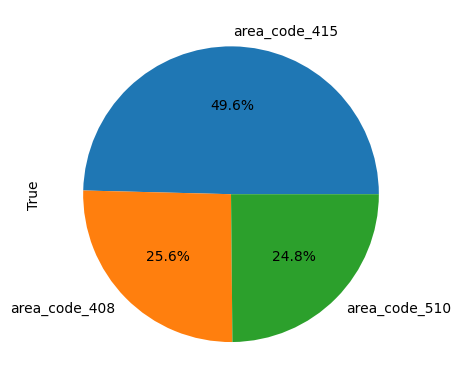

In [ ]:
train_data["area_code"].value_counts().plot(kind='pie', label=True, autopct = '%.1f%%')

<Axes: xlabel='account_length', ylabel='Count'>

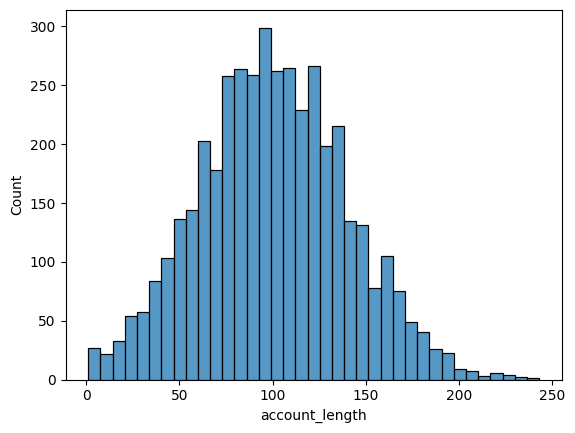

In [ ]:
sns.histplot(train_data['account_length'])

In [ ]:
cat_cols = ['state','area_code','international_plan','voice_mail_plan','churn']

train_data[cat_cols] = train_data[cat_cols].astype('category')
test_data[cat_cols[:-1]] = test_data[cat_cols[:-1]].astype('category')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   category
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

CLEANING THE DATA

1. Calculate the total_net_minutes to reduce the number of features; we are going to do the same with calls, and charge
2. Convert all yes, no strings into ints such as in columns (voice_mail_plan, international_plan, and churn)
3. Convert the categorical values into onehote vectors such as (state, and area_code)
4. Drop all repeted features and useless columns such as area (code and state)

In [ ]:
def clean_data(df):
  df['total_net_minutes'] = df["total_day_minutes"] + df["total_eve_minutes"] + df["total_night_minutes"]
  df["total_net_calls"]   = df["total_day_calls"] + df["total_eve_calls"] + df["total_night_calls"]
  df["total_net_charge"] = df["total_day_charge"] + df["total_eve_charge"] + df["total_night_charge"]

  df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
  df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})

  df.drop(columns = ["state", "area_code",'total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
  return df
clean_data(train_data)
clean_data(test_data)


,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,0,0,11.3,7,3.05,0,548.4,307,48.66
746,747,73,0,0,0,12.3,2,3.32,3,689.5,314,63.99
747,748,152,0,0,0,14.7,2,3.97,3,654.6,276,62.75
748,749,61,0,0,0,13.6,4,3.67,1,525.8,314,48.15


In [ ]:
# convert "CHURN" column from categorical into numerical
train_data['churn'] = train_data['churn'].map({"yes": 1, "no": 0})

In [ ]:
train_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


CORRELATION BETWEEN NUMERICAL COLUMS



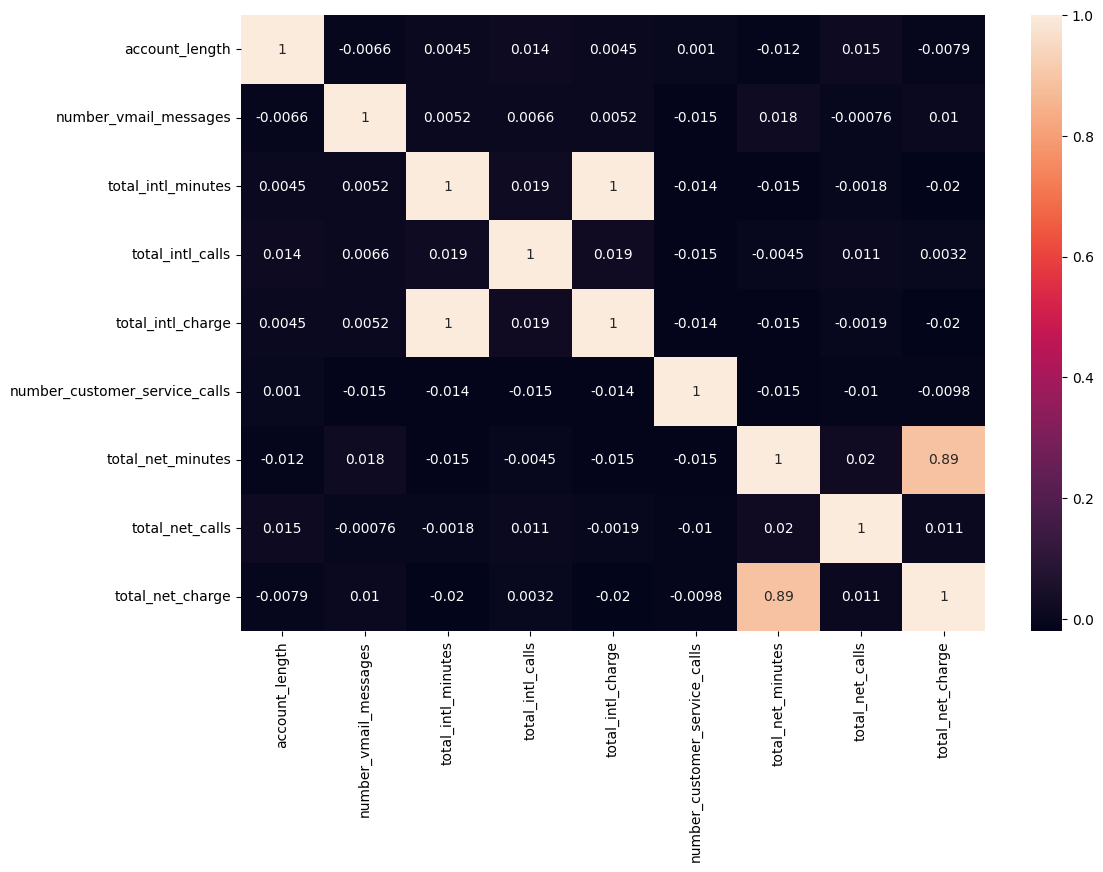

In [ ]:
corr_data = train_data[num_cols].corr()
plt.figure(figsize = [12, 8])
sns.heatmap(corr_data, annot = True)
plt.show()

SCALLING THE TRAIN DATA

In [ ]:
num_cols = train_data.select_dtypes(include = ["float", "int"]).columns
cat_cols = ["voice_mail_plan", "international_plan"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(train_data[num_cols])
train_scaled = pd.DataFrame(scaled_cols, columns = num_cols )
train_scaled[cat_cols] = train_data[cat_cols]
train_scaled.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,voice_mail_plan,international_plan
0,0.170399,1.366857,1.247901,-0.579164,1.248591,-0.426346,0.343852,0.845226,-0.110674,1,0
1,0.926186,-0.567911,0.704379,0.232927,0.698342,-1.188960,-0.605331,0.816157,0.224178,0,0
2,-0.409038,-0.567911,-1.324770,1.045017,-1.328187,0.336268,-0.256284,-1.509350,0.806780,0,1
3,-0.635774,-0.567911,-0.056552,-0.579164,-0.053219,1.098882,-0.890199,1.630084,-0.708761,0,1
4,0.523099,1.218029,-0.998657,1.045017,-0.992669,1.098882,2.233211,0.409193,1.896499,1,0


SCALLING THE TEST DATA

In [ ]:
num_cols = test_data.select_dtypes(include = ["float", "int"]).columns
cat_cols = ["voice_mail_plan", "international_plan"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(test_data[num_cols])
test_scaled = pd.DataFrame(scaled_cols, columns = num_cols )
test_scaled[cat_cols] = test_data[cat_cols]
test_scaled.head()

SPLITING THE TRAIN DATA

In [ ]:
from sklearn.model_selection import train_test_split

x= train_scaled
x[cat_cols] = x[cat_cols].astype(int)
y = pd.Series(train_data['churn'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2975, 11), (1275, 11), (2975,), (1275,))

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

lo_model = LogisticRegression()
lo_model.fit(x_train, y_train)
y_predict = lo_model.predict(x_test)

0.8689075630252101

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
lo_accuracy = accuracy_score(y_predict, y_test)
lo_accuracy

0.8588235294117647

In [ ]:
score = [i for i, j in zip(y_predict, y_test) if i == j]

score = len(score)/len(y_test)
score

0.8588235294117647

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1096
           1       0.49      0.22      0.31       179

    accuracy                           0.86      1275
   macro avg       0.69      0.59      0.61      1275
weighted avg       0.83      0.86      0.84      1275



DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_model_predict = dt_model.predict(x_test)

In [ ]:
score = [i for i, j in zip(dt_model_predict, y_test) if i == j]
score = len(score)/len(y_test)
score

0.9474509803921569

In [ ]:
accuracy = accuracy_score(dt_model_predict, y_test)
accuracy

0.9474509803921569

In [ ]:
print(classification_report(y_test, dt_model_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1096
           1       0.79      0.85      0.82       179

    accuracy                           0.95      1275
   macro avg       0.88      0.91      0.89      1275
weighted avg       0.95      0.95      0.95      1275



RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model_predict = rf_model.predict(x_test)

In [ ]:
score = [i for i, j in zip(rf_model_predict, y_test) if i == j]

score = len(score)/len(y_test)
score

0.9756862745098039

In [ ]:
rf_accuracy = accuracy_score(rf_model_predict, y_test)
rf_accuracy

0.9756862745098039

In [ ]:
print(classification_report(y_test, rf_model_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1096
           1       0.98      0.84      0.91       179

    accuracy                           0.98      1275
   macro avg       0.98      0.92      0.95      1275
weighted avg       0.98      0.98      0.97      1275



In [ ]:
import xgboost as xgb
xg_model = xgb.XGBClassifier()
xg_model.fit(x_train, y_train)
xg_model_predict = xg_model.predict(x_test)

In [ ]:
xg_accuracy = accuracy_score(xg_model_predict, y_test)
xg_accuracy

0.9764705882352941

PREDICTION OF TEST DATA

---



In [ ]:
test_data.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [ ]:
final_test = test_scaled[:5].drop(columns = 'id')
final_test

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,voice_mail_plan,international_plan
0,0.696065,1.172240,-0.106243,-0.613702,-0.106976,-0.497639,1.369617,-0.041312,1.536327,1,0
1,0.444001,-0.599015,-1.442710,0.625821,-1.445297,-1.281734,0.713930,0.473065,0.865723,0,1
2,-0.967554,-0.599015,1.013500,0.625821,1.017213,1.854646,0.525958,-1.705472,-0.112683,0,0
3,-0.186157,-0.599015,-0.792537,-0.613702,-0.789520,1.070551,-0.495721,1.350532,-0.013299,0,0
4,1.855557,-0.599015,1.880397,0.212647,1.887122,1.070551,0.760369,0.049461,-0.094350,0,0


In [ ]:
lo_pred = rf_model.predict(final_test)
lo_pred

array([0, 0, 0, 0, 0])

In [ ]:
data = sample_data[:5].copy()
data.reset_index(drop=True, inplace = True)
data.churn = lo_pred
data.churn = data.churn.map({1:'yes',0:'no'})
data

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [ ]:
xg_pred = xg_model.predict(final_test)
xg_pred

array([0, 0, 0, 0, 0])

In [ ]:
data = sample_data[:5].copy()
data.reset_index(drop=True, inplace = True)
data.churn = xg_pred
data.churn = data.churn.map({1:'yes',0:'no'})
data

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [ ]:
rf_pred = rf_model.predict(final_test)
rf_pred

array([0, 0, 0, 0, 0])

In [ ]:
data = sample_data[:5].copy()
data.reset_index(drop=True, inplace = True)
data.churn = rf_pred
data.churn = data.churn.map({1:'yes',0:'no'})
data

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
